In [14]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
#getting the data
data = pd.read_csv('diabetes.csv')
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [16]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
print("Data Dimensions: {}".format(data.shape))

Data Dimensions: (768, 9)


In [33]:
print(data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

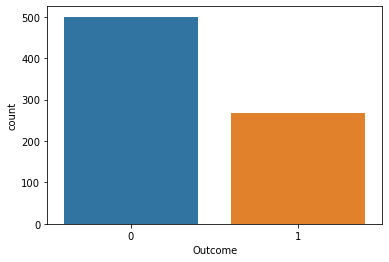

In [19]:
#plotting the data
sns.countplot(data['Outcome'], label='Count')

In [24]:
y = data['Outcome']

x = data.drop(['Outcome'], axis=1)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
neighbor_numbers = range(1,11)

In [31]:
#building the models up to 10
for n_neighbors in neighbor_numbers:
    #build the model
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    #getting accuracy for each instance of model
    training_accuracy.append(model.score(x_train, y_train))
    #getting test accuracy
    test_accuracy.append(model.score(x_test, y_test))

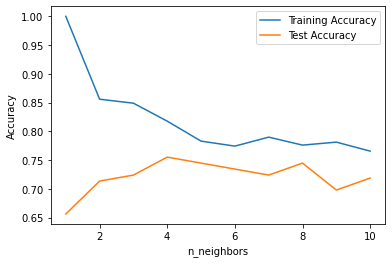

In [34]:
#plot accuracy
plt.plot(neighbor_numbers, training_accuracy, label="Training Accuracy")
plt.plot(neighbor_numbers, test_accuracy, label="Test Accuracy")
plt.ylabel ("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [35]:
#checking accuracy of KNN in predicting dataset
model.fit(x_train, y_train)
print("Model Accuracy on training set: {:.2f}".format(model.score(x_train, y_train)))
print("Model Accuracy on test set: {:.2f}".format(model.score(x_test, y_test)))

Model Accuracy on training set: 0.77
Model Accuracy on test set: 0.72
